In [4]:
import pandas as pd


In [5]:
#df1=pd.read_csv('Chicago_Crimes_2001_to_2004.csv' ,on_bad_lines='skip')
#df2=pd.read_csv('Chicago_Crimes_2005_to_2007.csv',on_bad_lines='skip')
#df3=pd.read_csv('Chicago_Crimes_2008_to_2011.csv',on_bad_lines='skip')
df4=pd.read_csv('Chicago_Crimes_2012_to_2017.csv',on_bad_lines='skip')

In [6]:
#df2.columns


In [7]:
df4.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [8]:
#df=pd.concat((df1,df2,df3,df4),axis=0)

In [9]:
df=df4

In [10]:
df.shape

(1456714, 23)

In [11]:
df.isnull().sum()

Unnamed: 0                  0
ID                          0
Case Number                 1
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1658
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Ward                       14
Community Area             40
FBI Code                    0
X Coordinate            37083
Y Coordinate            37083
Year                        0
Updated On                  0
Latitude                37083
Longitude               37083
Location                37083
dtype: int64

In [12]:
df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [13]:
df['X Coordinate']

0          1154907.0
1          1183066.0
2          1140789.0
3          1143223.0
4          1139890.0
             ...    
1456709    1159105.0
1456710    1175230.0
1456711    1161027.0
1456712    1197261.0
1456713    1178696.0
Name: X Coordinate, Length: 1456714, dtype: float64

In [14]:
df_new=df.drop(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 
        'Beat',  'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],axis=1)

In [15]:
x=df_new.drop('Arrest',axis=1)
y=df_new['Arrest']

In [16]:
print(x)
y

         IUCR            Primary Type              Description  \
0        0486                 BATTERY  DOMESTIC BATTERY SIMPLE   
1        0486                 BATTERY  DOMESTIC BATTERY SIMPLE   
2        0470  PUBLIC PEACE VIOLATION         RECKLESS CONDUCT   
3        0460                 BATTERY                   SIMPLE   
4        0820                   THEFT           $500 AND UNDER   
...       ...                     ...                      ...   
1456709  0486                 BATTERY  DOMESTIC BATTERY SIMPLE   
1456710  1310         CRIMINAL DAMAGE              TO PROPERTY   
1456711  041A                 BATTERY      AGGRAVATED: HANDGUN   
1456712  0486                 BATTERY  DOMESTIC BATTERY SIMPLE   
1456713  5007           OTHER OFFENSE  OTHER WEAPONS VIOLATION   

                   Location Description  Domestic  District  
0                             APARTMENT      True      10.0  
1                             RESIDENCE      True       3.0  
2                    

0           True
1          False
2          False
3          False
4          False
           ...  
1456709     True
1456710     True
1456711    False
1456712    False
1456713     True
Name: Arrest, Length: 1456714, dtype: bool

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
le.fit(x['IUCR'])
x['IUCR']=le.transform(x['IUCR'])
le.fit(x['Primary Type'])
x['Primary Type']=le.transform(x['Primary Type'])
le.fit(x['Description'])
x['Description']=le.transform(x['Description'])
le.fit(x['Location Description'])
x['Location Description']=le.transform(x['Location Description'])
le.fit(x['Domestic'])
x['Domestic']=le.transform(x['Domestic'])
le.fit(df['District'])
x['District']=le.transform(x['District'])

In [23]:
y

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [22]:
x

,IUCR,Primary Type,Description,Location Description,Domestic,District
0,51,2,120,17,1,9
1,51,2,120,111,1,2
2,42,27,265,127,0,14
3,39,2,283,123,0,14
4,84,31,0,111,1,14
...,...,...,...,...,...,...
1456709,51,2,120,17,1,9
1456710,151,6,306,17,1,6
1456711,30,2,32,123,0,7
1456712,51,2,120,123,1,3


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt


c:\Users\manas\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='IUCR'>

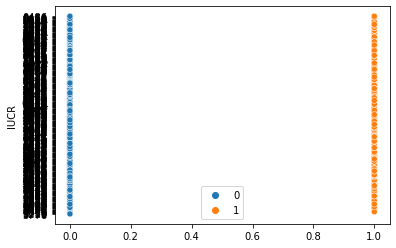

In [27]:
sns.scatterplot(y,df['IUCR'],hue=y)

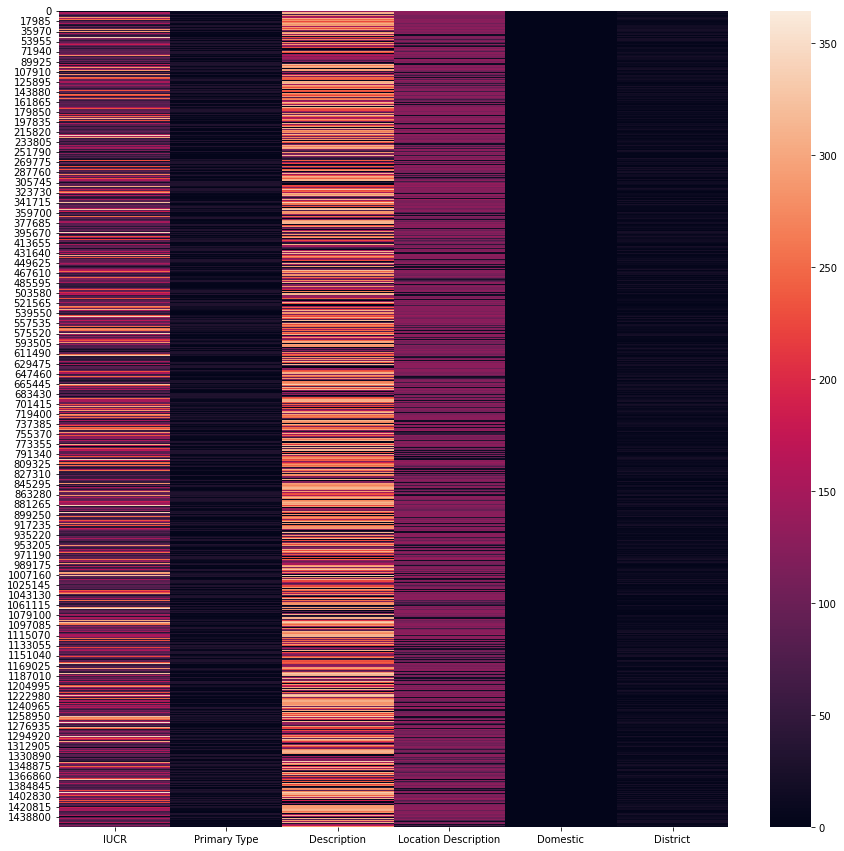

In [31]:
plt.figure(figsize=(15,15))
sns.heatmap(x)
plt.show()

In [32]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [33]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [34]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [35]:
ypred=lr.predict(xtest)

In [36]:
accuracy_score(ytest,ypred)

0.7674610711302816